In [1]:
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, Input
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.utils import to_categorical
from tqdm.notebook import tqdm as tqdm
from tensorflow.keras import Model
from keras.models import Sequential
from sklearn.utils import shuffle
from keras import models, layers
from datetime import datetime
from tensorflow import keras
from keras import backend as K

import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import json
import cv2
import os

Using TensorFlow backend.
/opt/conda/lib/python3.6/site-packages/pandas/core/nanops.py:38: UserWarning: The installed version of bottleneck 0.7.0 is not supported in pandas and will be not be used
The minimum supported version is 1.0.0

  ver=ver, min_ver=_MIN_BOTTLENECK_VERSION), UserWarning)


# Loading Dataset

In [2]:
mapping_data = json.load(open("/root/notebooks/0858611-2/tooth_xray/model/dataset/Dental_Data/CAL/10/mapping.json", "r"))
filter_data  = { path: max(cal) for path, cal in mapping_data.items() if max(cal) >= 0 }

In [3]:
def json_2_dataframe_CAL(dataframe, data):
        classifier = lambda x : 0 if 0 <= x < 3 else 1 if 3<= x <=4 else 2
    
        for path, cal in tqdm(data.items()):
                item = { "Path": path, "CAL": cal, "Class": classifier(cal) }
                dataframe = dataframe.append(item, ignore_index=True)

        return dataframe

CAL_columns = ["Path", "CAL", "Class"]
dataset = pd.DataFrame(columns=CAL_columns)
dataset = json_2_dataframe_CAL(dataset, filter_data)

dataset

,Path,CAL,Class
0,Dental_Data/CAL/10/05-22-09-791_000411 112119 ...,1,0
1,Dental_Data/CAL/10/05-22-09-824_000411 112119 ...,1,0
2,Dental_Data/CAL/10/05-22-09-861_000411 112119 ...,1,0
3,Dental_Data/CAL/10/05-22-09-904_000411 112119 ...,1,0
4,Dental_Data/CAL/10/05-22-09-933_000411 112119 ...,1,0
5,Dental_Data/CAL/10/05-22-09-961_000411 112119 ...,1,0
6,Dental_Data/CAL/10/05-22-09-989_000411 112119 ...,1,0
7,Dental_Data/CAL/10/05-22-10-017_000411 112119 ...,1,0
8,Dental_Data/CAL/10/05-22-10-046_000411 112119 ...,1,0
9,Dental_Data/CAL/10/05-22-10-076_000411 112119 ...,1,0


# Split dataset and guarantee no data pollution 

In [4]:
data_num = min(len(dataset[dataset["Class"] == 2]), len(dataset[dataset["Class"] == 1]), len(dataset[dataset["Class"] == 0]))

serious = dataset[dataset["Class"] == 2]
medium  = dataset[dataset["Class"] == 1]
healthy = dataset[dataset["Class"] == 0]

In [5]:
def path_2_images(path_list, resize_setting):
        images = []
        for path in tqdm(path_list):
                image = cv2.imread(path)
                image = cv2.resize(image, resize_setting)
                #image = np.reshape(image, (*image.shape))
                images.append(image)
        return np.array(images)
    
train_range = (0, int( data_num * 0.6 ))
valid_range = (train_range[1], int( data_num * 0.8))
test_range  = (valid_range[1], data_num)


serious_train   = serious.iloc[ train_range[0]: train_range[1], :]
serious_valid   = serious.iloc[ valid_range[0]: valid_range[1], :]
serious_test    = serious.iloc[ test_range[0] : test_range[1] , :]

medium_train    = medium.iloc[ train_range[0]: train_range[1],  :]
medium_valid    = medium.iloc[ valid_range[0]: valid_range[1],  :]
medium_test     = medium.iloc[ test_range[0] : test_range[1] ,  :]

healthy_train   =  healthy.iloc[ train_range[0]: train_range[1], :]
healthy_valid   =  healthy.iloc[ valid_range[0]: valid_range[1], :]
healthy_test    =  healthy.iloc[ test_range[0] : test_range[1] , :]
 
train_dataset   = pd.concat([healthy_train, medium_train, serious_train])
valid_dataset   = pd.concat([healthy_valid, medium_valid, serious_valid])
test_dataset    = pd.concat([healthy_test , medium_test , serious_test ])

train_dataset = shuffle(train_dataset)
valid_dataset = shuffle(valid_dataset)
test_dataset = shuffle(test_dataset)

resize_setting = (256, 256)

X_train, y_train = path_2_images(train_dataset["Path"], resize_setting), to_categorical(train_dataset["Class"], 3)  
X_val, y_val     = path_2_images(valid_dataset["Path"], resize_setting), to_categorical(valid_dataset["Class"], 3) 
X_test, y_test   = path_2_images(test_dataset ["Path"], resize_setting), to_categorical(test_dataset ["Class"], 3)

In [6]:
print(X_train.shape)

(14688, 256, 256, 3)


In [7]:
train_dataset

,Path,CAL,Class
2092,Dental_Data/CAL/10/05-23-14-613_005627 120209 ...,3,1
29560,Dental_Data/CAL/10/05-36-29-197_026550 031017 ...,5,2
20295,Dental_Data/CAL/10/05-32-08-028_022702 090518 ...,6,2
13720,Dental_Data/CAL/10/05-29-04-664_018526 011218 ...,3,1
28161,Dental_Data/CAL/10/05-35-51-570_026127 010814 ...,6,2
364,Dental_Data/CAL/10/05-22-20-291_000411 112119 ...,1,0
10474,Dental_Data/CAL/10/05-27-26-006_016649 102411 ...,4,1
5667,Dental_Data/CAL/10/05-25-10-215_010953 031618 ...,0,0
30239,Dental_Data/CAL/10/05-36-45-838_026610 090814 ...,5,2
6719,Dental_Data/CAL/10/05-25-39-175_014735 021809 ...,3,1


In [8]:
def VGG_Net(input_shape, classes):
        model = models.Sequential()
        model.add(Conv2D(512, (3, 3), activation='relu', input_shape=input_shape))
        model.add(MaxPooling2D((2, 2)))
        
        model.add(Conv2D(256, (3, 3), activation='relu'))
        model.add(MaxPooling2D((2, 2)))

        model.add(Conv2D(128, (3, 3), activation='relu'))
        model.add(MaxPooling2D((2, 2)))
        
        model.add(Conv2D(64, (3, 3), activation='relu'))
        model.add(MaxPooling2D((2, 2)))
        
        #model.add(Conv2D(32, (3, 3), activation='relu'))
        #model.add(MaxPooling2D((2, 2)))
        
        model.add(Flatten())
        model.add(Dense(2048, activation='relu'))
        model.add(Dropout(0.3))
        model.add(Dense(512, activation='relu'))
        model.add(Dropout(0.3))
        model.add(Dense(64, activation='relu'))
        model.add(Dense(classes, activation='softmax'))
        model.compile(loss=keras.losses.categorical_crossentropy,
                      optimizer=keras.optimizers.Adadelta(),
                      metrics=['accuracy'])
        
        return model

In [9]:
input_shape= (*resize_setting, 3)
classes    = 3
model = VGG_Net(input_shape, classes)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 254, 512)     14336     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 127, 127, 512)     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 125, 125, 256)     1179904   
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 128)       295040    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 64)       

In [10]:
def plot_result(history):
        plt.style.use('fivethirtyeight')
        plt.figure(figsize=(16,5))
        
        plt.subplot(121)
        plt.title("Loss")
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label = 'Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend(loc='lower right')
        
        plt.subplot(122)
        plt.title("Accuracy")
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.ylim([0.1, 1.5])
        plt.legend(loc='lower right')
        plt.show()

In [11]:
batch_size = 64
epochs     = 50

callback = tf.keras.callbacks.EarlyStopping(
                monitor="val_accuracy",
                min_delta=0.02,
                patience=10,
                verbose=0,
                mode="auto",
                baseline=None,
                restore_best_weights=False,
)

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), shuffle=True, epochs=epochs, batch_size=batch_size, callbacks=[callback])

Train on 14688 samples, validate on 4896 samples
Epoch 1/50
14688/14688 [==============================] - 180s 12ms/step - loss: 3.1402 - accuracy: 0.3422 - val_loss: 1.2482 - val_accuracy: 0.3421
Epoch 2/50
14688/14688 [==============================] - 170s 12ms/step - loss: 1.4273 - accuracy: 0.3521 - val_loss: 1.1040 - val_accuracy: 0.3711
Epoch 3/50
14688/14688 [==============================] - 170s 12ms/step - loss: 1.1988 - accuracy: 0.3621 - val_loss: 1.0869 - val_accuracy: 0.3895
Epoch 4/50
14688/14688 [==============================] - 170s 12ms/step - loss: 1.1311 - accuracy: 0.3809 - val_loss: 1.0816 - val_accuracy: 0.4105
Epoch 5/50
14688/14688 [==============================] - 170s 12ms/step - loss: 1.1106 - accuracy: 0.3876 - val_loss: 1.0761 - val_accuracy: 0.4214
Epoch 6/50
14688/14688 [==============================] - 170s 12ms/step - loss: 1.0896 - accuracy: 0.4065 - val_loss: 1.0603 - val_accuracy: 0.4792
Epoch 7/50
14688/14688 [==============================] -

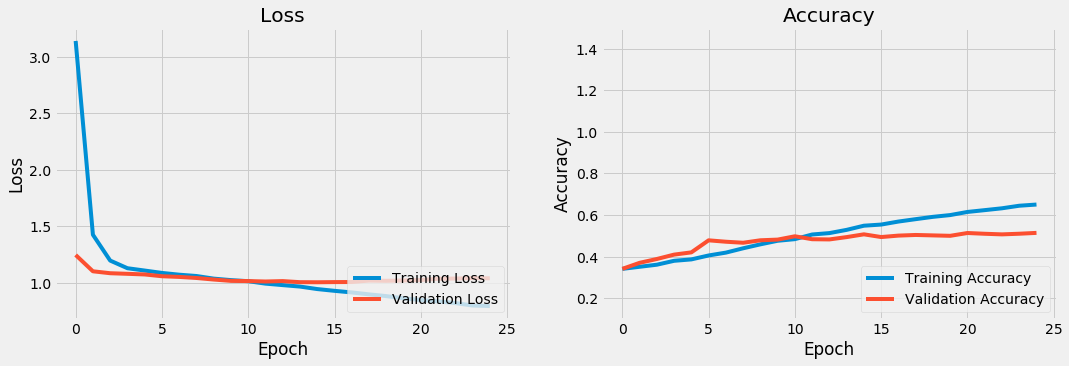

In [12]:
plot_result(history)

Test Loss = 1.0627599181303011
Test Acc  = 0.4665032625198364


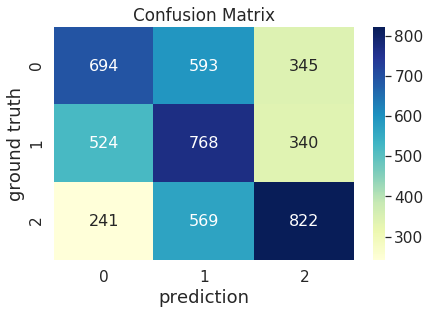

In [13]:
def plot_confusion_matrix(confusion_matrix):
        df_cm = pd.DataFrame(confusion_matrix, range(3), range(3))
        sns.set(font_scale=1.4)
        sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, cmap='YlGnBu', fmt='g') # font size
        plt.title("Confusion Matrix")
        plt.xlabel('prediction' , fontsize=18)
        plt.ylabel('ground truth', fontsize=18)
        plt.show()

results = model.evaluate(X_test, y_test, verbose=2, batch_size=8)
print("Test Loss = {}\nTest Acc  = {}".format(*results))
prediction = model.predict_classes(X_test, batch_size=8)
y = np.argmax(y_test, axis=1)
confusion = confusion_matrix(y, prediction)
plot_confusion_matrix(confusion)

In [14]:
if not os.path.isfile("VGG_Net_cal.h5"):
        model.save("VGG_Net_cal.h5")

In [15]:
def gradcam(model, x, layer_name):
        preds = model.predict(x)
        pred_class = np.argmax(preds[0])


        # 預測分類的輸出向量
        pred_output = model.output[:, pred_class]
#         preds = model.predict(x) 
        
        pred_output = model.output
        conv_layer = model.get_layer(layer_name)
        grads = K.gradients(pred_output, conv_layer.output)[0]
        pooled_grads = K.sum(grads, axis=(0, 1, 2))
        iterate = K.function([model.input], [pooled_grads, conv_layer.output[0]])
        pooled_grads_value, conv_layer_output_value = iterate([x])

        for i in range(pooled_grads_value.shape[0]):
                conv_layer_output_value[:, :, i] *= (pooled_grads_value[i])

        heatmap = np.sum(conv_layer_output_value, axis=-1)
    
        return heatmap

def plot_heatmap(heatmaps, image):
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

        plt.figure(figsize=(16,5))
        for idx, heatmap in enumerate(heatmaps):
                # ReLU
                heatmap = np.maximum(heatmap, 0)

                # normalize
                heatmap /= np.max(heatmap)
                heatmap = cv2.resize(heatmap, (image.shape[1], image.shape[0]))
                heatmap = np.uint8(255 * heatmap)

                plt.subplot(1, 7, idx+1)
                plt.xticks([]), plt.yticks([])
                plt.imshow(image, alpha=0.6)
                plt.imshow(heatmap, cmap='jet', alpha=0.4)
                
        plt.show()

Conv_layers = [ layer.name for layer in model.layers if 'conv' in layer.name ]

same = []
diff = []
for idx, (truth, pred) in enumerate(zip(y, prediction)):
        if truth == pred:
                same.append(idx)
        else:
                diff.append(idx)
same_generator = ( X_test[i] for i in same )
diff_generator = ( X_test[i] for i in diff )

In [17]:
for idx, i in enumerate(same_generator):
        heatmaps = [ gradcam(model, i.reshape(1, *resize_setting, 3), Conv_layers[-1]) ]
        plot_heatmap(heatmaps, i)

error: OpenCV(3.4.2) /io/opencv/modules/imgproc/src/color.hpp:253: error: (-215:Assertion failed) VScn::contains(scn) && VDcn::contains(dcn) && VDepth::contains(depth) in function 'CvtHelper'


In [ ]:
for idx, i in enumerate(diff_generator):
        heatmaps = [ gradcam(model, i.reshape(1, *resize_setting, 1), Conv_layers[-1]) ]
        plot_heatmap(heatmaps, i)